# **Análise exploratória das remunerações dos profissionais de dados no Brasil em 2022**
<br>


---

# 1\. Introdução

### 1\.1\. Contexto

A **State of Data Brazil**, realizada pelo [Data Hackers](https://www.datahackers.com.br/) e pela [Bain & Company](https://www.bain.com/), é uma das maiores pesquisas sobre o mercado brasileiro de dados.<br><br>
Dentre os assuntos pesquisados na pesquisa de 2022, foi mapeado o perfil atual das três maiores profissões da área de dados do Brasil: **Analista de dados, Cientista de dados e Engenheiro de dados**.

### 1\.2\. Objetivo

Examinar como os **salários estão distribuídos** para os profissionais de três níveis de experiência, **júnior, pleno e sênior**, que ocupam as posições de **analista, cientista e engenheiro de dados.**

# 2\. Dados

### 2\.1\. Descrição

Os dados foram disponibilizados pelo site do [Kaggle](https://www.kaggle.com/), está em formato **CSV** e possui em torno de **10 MB**.

A pesquisa, realizada de outubro a novembro de 2022 por meio de um **questionário online**, coletou dados demográficos, educacionais, profissionais, salariais e de satisfação no trabalho de **4.271 respondentes** em todo o Brasil. 

A amostra incluiu profissionais de diferentes funções, como **analistas, cientistas e engenheiros de dados**, abrangendo diversos níveis de experiência, **desde júnior até gestores**.

### 2\.2\. Acesso e utilização dos dados

Foi acessado o site do **Kaggle**, realizado o download do arquivo através desse [link](https://www.kaggle.com/datasets/datahackers/state-of-data-2022), feito o upload do computador para o ambiente do [Google Colab](https://colab.research.google.com/), onde foi efetivamente idealizado o projeto, e finalmente o notebook foi importado para o Kaggle.

# 3\. Processamento

## 3\.1\. Leitura

In [1]:
import pandas as pd
import seaborn as sns
import os

In [2]:
dataset = '/kaggle/input/state-of-data-2022/'

for dirname, _, filenames in os.walk(dataset):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/state-of-data-2022/State_of_data_2022.csv


In [3]:
data = list()

with open(file="/kaggle/input/state-of-data-2022/State_of_data_2022.csv", mode="r") as fp:
  header = fp.readline()
  line = fp.readline()

  while line:
    line = line.split(sep=',')
    data.append({"Cargo": line[21], "Experiência": line[22], "Salário": line[23]})
    line = fp.readline()

data_table = pd.DataFrame(data)

In [4]:
data_table.head(n=15)

,Cargo,Experiência,Salário
0,DBA/Administrador de Banco de Dados,Júnior,de R$ 8.001/mês a R$ 12.000/mês
1,Supervisor/Coordenador,,
2,Desenvolvedor/ Engenheiro de Software/ Analist...,Pleno,de R$ 12.001/mês a R$ 16.000/mês
3,Cientista de Dados/Data Scientist,Sênior,de R$ 12.001/mês a R$ 16.000/mês
4,Desenvolvedor/ Engenheiro de Software/ Analist...,Pleno,de R$ 6.001/mês a R$ 8.000/mês
5,Professor,Pleno,de R$ 2.001/mês a R$ 3.000/mês
6,Analista de BI/BI Analyst,Júnior,de R$ 4.001/mês a R$ 6.000/mês
7,Desenvolvedor/ Engenheiro de Software/ Analist...,Júnior,de R$ 2.001/mês a R$ 3.000/mês
8,Analista de BI/BI Analyst,Sênior,de R$ 6.001/mês a R$ 8.000/mês
9,Professor,Pleno,de R$ 8.001/mês a R$ 12.000/mês


In [5]:
data_table.shape

(4271, 3)

### 3\.2\. Limpeza

Removemos os valores faltantes.

In [6]:
data_table = data_table.replace('', pd.NA)

data_table = data_table.dropna()

data_table.shape

(2790, 3)

Removemos as linhas corrompidas.

In [7]:
data_table['Salário'] = data_table['Salário'].apply(lambda row: row if 'R$' in row else pd.NA)

data_table = data_table.dropna()

data_table.shape

(2386, 3)

Selecionamos as linhas com os cargos de interesse.

In [8]:
positions = [
    'Analista de Dados/Data Analyst',
    'Cientista de Dados/Data Scientist',
    'Engenheiro de Dados/Arquiteto de Dados/Data Engineer/Data Architect'
    ]

data_table['Cargo'] = data_table['Cargo'].apply(lambda row: row if row in positions else pd.NA)

data_table = data_table.dropna()

data_table.shape

(1336, 3)

Renomeamos os cargos.

In [9]:
labels = ['Analista', 'Cientista', 'Engenheiro']

labels = dict(zip(positions, labels))

data_table['Cargo'] = data_table['Cargo'].apply(lambda row: labels[row])

data_table.head(n=15)

,Cargo,Experiência,Salário
3,Cientista,Sênior,de R$ 12.001/mês a R$ 16.000/mês
18,Engenheiro,Pleno,de R$ 6.001/mês a R$ 8.000/mês
23,Engenheiro,Sênior,de R$ 12.001/mês a R$ 16.000/mês
29,Cientista,Júnior,de R$ 8.001/mês a R$ 12.000/mês
30,Analista,Júnior,de R$ 3.001/mês a R$ 4.000/mês
31,Engenheiro,Júnior,de R$ 2.001/mês a R$ 3.000/mês
37,Engenheiro,Júnior,de R$ 2.001/mês a R$ 3.000/mês
41,Engenheiro,Júnior,de R$ 4.001/mês a R$ 6.000/mês
45,Cientista,Sênior,de R$ 6.001/mês a R$ 8.000/mês
49,Engenheiro,Sênior,de R$ 8.001/mês a R$ 12.000/mês


In [10]:
data_table.to_csv("data.csv", header=True, index=False)

# 4\. Insights

### 4\.1\. Análise da quantidade de pessoas por salário, cargo e nível de experiência

### Agrupamento e Agregações:

A criação da coluna 'Quantidade' unitária, facilita o agrupamento e agregações.

In [11]:
data_table['Quantidade'] = 1

data_table.head(15)

,Cargo,Experiência,Salário,Quantidade
3,Cientista,Sênior,de R$ 12.001/mês a R$ 16.000/mês,1
18,Engenheiro,Pleno,de R$ 6.001/mês a R$ 8.000/mês,1
23,Engenheiro,Sênior,de R$ 12.001/mês a R$ 16.000/mês,1
29,Cientista,Júnior,de R$ 8.001/mês a R$ 12.000/mês,1
30,Analista,Júnior,de R$ 3.001/mês a R$ 4.000/mês,1
31,Engenheiro,Júnior,de R$ 2.001/mês a R$ 3.000/mês,1
37,Engenheiro,Júnior,de R$ 2.001/mês a R$ 3.000/mês,1
41,Engenheiro,Júnior,de R$ 4.001/mês a R$ 6.000/mês,1
45,Cientista,Sênior,de R$ 6.001/mês a R$ 8.000/mês,1
49,Engenheiro,Sênior,de R$ 8.001/mês a R$ 12.000/mês,1


**Agregação por salário:**

No primeiro nível de agregação, vamos contar quantos profissionais estão em cada faixa de salário.

In [12]:
salario_agg = data_table[['Salário', 'Quantidade']].groupby('Salário').agg('sum').reset_index()

salario_agg.head(15)

,Salário,Quantidade
0,Acima de R$ 40.001/mês,12
1,Menos de R$ 1.000/mês,8
2,de R$ 1.001/mês a R$ 2.000/mês,59
3,de R$ 12.001/mês a R$ 16.000/mês,192
4,de R$ 16.001/mês a R$ 20.000/mês,49
5,de R$ 2.001/mês a R$ 3.000/mês,75
6,de R$ 20.001/mês a R$ 25.000/mês,24
7,de R$ 25.001/mês a R$ 30.000/mês,13
8,de R$ 3.001/mês a R$ 4.000/mês,89
9,de R$ 30.001/mês a R$ 40.000/mês,17


A coluna 'Salário' é uma coluna textual, portanto, não é numericamente ordenável.
No entanto, podemos manualmente definir uma coluna artificial de ordenamento chamada 'salario_ordem'.

In [13]:
salario_ordem = {
'Menos de R$ 1.000/mês': 0,
'de R$ 1.001/mês a R$ 2.000/mês': 1,
'de R$ 2.001/mês a R$ 3.000/mês': 2,
'de R$ 3.001/mês a R$ 4.000/mês': 3,
'de R$ 4.001/mês a R$ 6.000/mês': 4,
'de R$ 6.001/mês a R$ 8.000/mês': 5,
'de R$ 8.001/mês a R$ 12.000/mês': 6,
'de R$ 12.001/mês a R$ 16.000/mês': 7,
'de R$ 16.001/mês a R$ 20.000/mês': 8,
'de R$ 20.001/mês a R$ 25.000/mês': 9,
'de R$ 25.001/mês a R$ 30.000/mês': 10,
'de R$ 30.001/mês a R$ 40.000/mês': 11,
'Acima de R$ 40.001/mês': 12
}

salario_agg['Ordem'] = salario_agg['Salário'].apply(lambda row: salario_ordem[row])

salario_agg.head(15)

,Salário,Quantidade,Ordem
0,Acima de R$ 40.001/mês,12,12
1,Menos de R$ 1.000/mês,8,0
2,de R$ 1.001/mês a R$ 2.000/mês,59,1
3,de R$ 12.001/mês a R$ 16.000/mês,192,7
4,de R$ 16.001/mês a R$ 20.000/mês,49,8
5,de R$ 2.001/mês a R$ 3.000/mês,75,2
6,de R$ 20.001/mês a R$ 25.000/mês,24,9
7,de R$ 25.001/mês a R$ 30.000/mês,13,10
8,de R$ 3.001/mês a R$ 4.000/mês,89,3
9,de R$ 30.001/mês a R$ 40.000/mês,17,11


Abaixo, ordenamos o salário corretamente.

In [14]:
salario_agg = salario_agg.sort_values(by='Ordem', ascending=True)

salario_agg.head(15)

,Salário,Quantidade,Ordem
1,Menos de R$ 1.000/mês,8,0
2,de R$ 1.001/mês a R$ 2.000/mês,59,1
5,de R$ 2.001/mês a R$ 3.000/mês,75,2
8,de R$ 3.001/mês a R$ 4.000/mês,89,3
10,de R$ 4.001/mês a R$ 6.000/mês,244,4
11,de R$ 6.001/mês a R$ 8.000/mês,234,5
12,de R$ 8.001/mês a R$ 12.000/mês,320,6
3,de R$ 12.001/mês a R$ 16.000/mês,192,7
4,de R$ 16.001/mês a R$ 20.000/mês,49,8
6,de R$ 20.001/mês a R$ 25.000/mês,24,9


**Agregação por salário e cargo:**

No segundo nível de agregação, vamos contar quantos profissionais estão em cada faixa de salário por cargo.

In [15]:
salario_cargo_agg = data_table[['Cargo', 'Salário', 'Quantidade']].groupby(['Cargo', 'Salário']).agg('sum').reset_index()

salario_cargo_agg['Ordem'] = salario_cargo_agg['Salário'].apply(lambda row: salario_ordem[row])

salario_cargo_agg = salario_cargo_agg.sort_values(by=['Cargo', 'Ordem'], ascending=[True, True])

salario_cargo_agg.head(100)

,Cargo,Salário,Quantidade,Ordem
1,Analista,Menos de R$ 1.000/mês,4,0
2,Analista,de R$ 1.001/mês a R$ 2.000/mês,28,1
5,Analista,de R$ 2.001/mês a R$ 3.000/mês,36,2
8,Analista,de R$ 3.001/mês a R$ 4.000/mês,59,3
10,Analista,de R$ 4.001/mês a R$ 6.000/mês,122,4
11,Analista,de R$ 6.001/mês a R$ 8.000/mês,91,5
12,Analista,de R$ 8.001/mês a R$ 12.000/mês,106,6
3,Analista,de R$ 12.001/mês a R$ 16.000/mês,35,7
4,Analista,de R$ 16.001/mês a R$ 20.000/mês,6,8
6,Analista,de R$ 20.001/mês a R$ 25.000/mês,4,9


**Agregação por salário, cargo e experiência:**

Por fim, no terceiro nível de agregação vamos contar quantos profissionais estão em cada faixa de salário por cargo e nivel de experiência.

In [16]:
salario_cargo_experiencia_agg = data_table[['Cargo', 'Experiência', 'Salário', 'Quantidade']].groupby(['Cargo', 'Experiência', 'Salário']).agg('sum').reset_index()

salario_cargo_experiencia_agg['Ordem'] = salario_cargo_experiencia_agg['Salário'].apply(lambda row: salario_ordem[row])

salario_cargo_experiencia_agg = salario_cargo_experiencia_agg.sort_values(by=['Cargo', 'Experiência', 'Ordem'], ascending=[True, True, True])

salario_cargo_experiencia_agg.head(15)

,Cargo,Experiência,Salário,Quantidade,Ordem
0,Analista,Júnior,Menos de R$ 1.000/mês,4,0
1,Analista,Júnior,de R$ 1.001/mês a R$ 2.000/mês,26,1
2,Analista,Júnior,de R$ 2.001/mês a R$ 3.000/mês,34,2
3,Analista,Júnior,de R$ 3.001/mês a R$ 4.000/mês,46,3
4,Analista,Júnior,de R$ 4.001/mês a R$ 6.000/mês,54,4
5,Analista,Júnior,de R$ 6.001/mês a R$ 8.000/mês,12,5
6,Analista,Júnior,de R$ 8.001/mês a R$ 12.000/mês,1,6
7,Analista,Pleno,de R$ 1.001/mês a R$ 2.000/mês,1,1
10,Analista,Pleno,de R$ 2.001/mês a R$ 3.000/mês,2,2
13,Analista,Pleno,de R$ 3.001/mês a R$ 4.000/mês,12,3


# 5\. Visualização dos dados

### 5\.1\. Visualização por salário

Vamos utilizar o gráfico de barras para visualização. No primeiro nível, no eixo x temos o salário (representado pela sua ordem) e no eixo y, a quantidade de profissionais. A cor das barras e a legenda também representam a faixa de salário.

Aqui vemos que, de maneira geral, o salário fica concentrado entre as categorias 4 e 7, portanto, de 3.000,00 a 16.000,00 por mês.

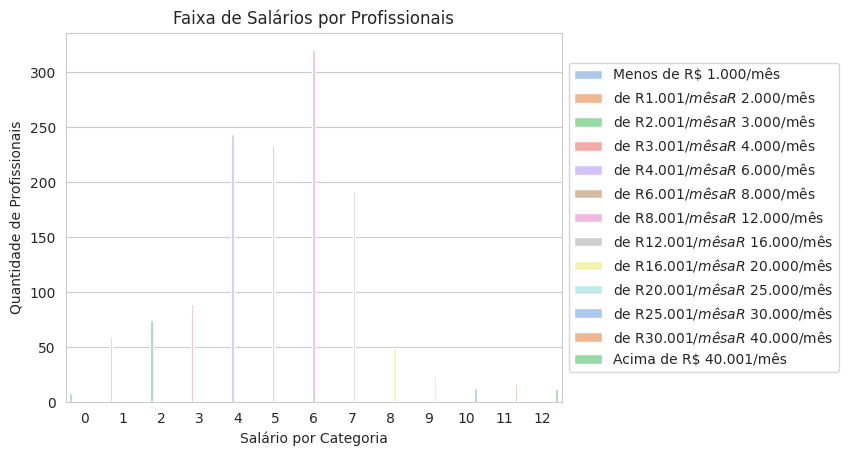

In [17]:
with sns.axes_style('whitegrid'):
  plot = sns.barplot(data=salario_agg, x='Ordem', y='Quantidade', hue='Salário', palette='pastel')
  plot.set_title('Faixa de Salários por Profissionais')
  plot.set_ylabel('Quantidade de Profissionais')
  plot.set_xlabel('Salário por Categoria')
  plot.legend(loc='center left', bbox_to_anchor=(1, 0.5))

### 5\.2\. Visualização por salário e cargo

No segundo nível de agregação, incrementamos o gráfico anterior com a informação do cargo, possibilitando assim, analisar a distribuição dos salários separados por cargos.

Levando em conta a faixa salarial de 8.000,00 a 12.000,00 como sendo uma faixa satisfatória dentro do mercado brasileiro, observamos que os salários dos profissionais de dados estão consideravelmente elevados. Isso é evidenciado pela presença significativa das barras correspondentes a essa faixa salarial nos três cargos analisados.

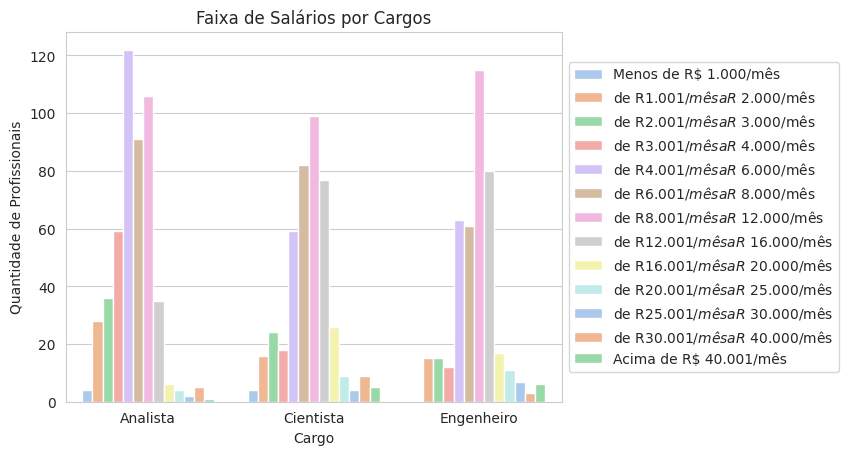

In [18]:
with sns.axes_style('whitegrid'):
  plot = sns.barplot(data=salario_cargo_agg, x='Cargo', y='Quantidade', hue='Salário', palette='pastel')
  plot.set_title('Faixa de Salários por Cargos')
  plot.set_ylabel('Quantidade de Profissionais')
  plot.set_xlabel('Cargo')
  plot.legend(loc='center left', bbox_to_anchor=(1, 0.5))

### 5\.3\. Visualização por salário, cargo e nível de experiência

Por fim, no terceiro nível, aplicamos a mesma técnica do gráfico anterior, mas agora distribuídos por experiência (eixo x) e cargo (DataFrame dedicado a cada cargo).

**Analista de Dados:**

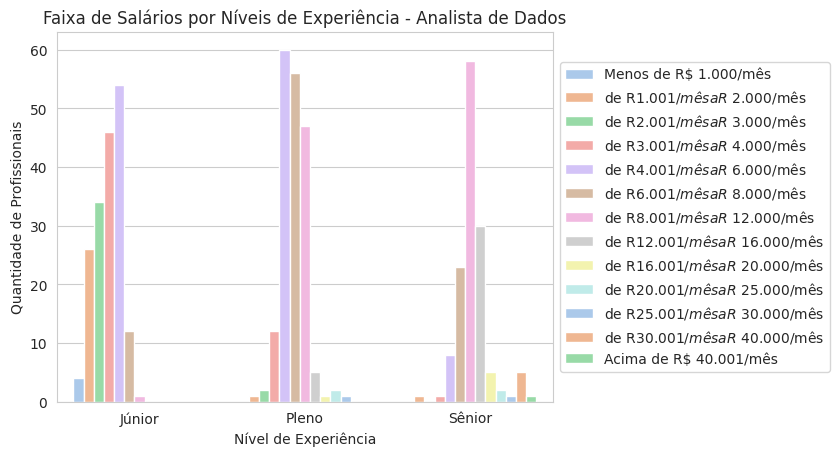

In [19]:
data = salario_cargo_experiencia_agg[salario_cargo_experiencia_agg['Cargo'] == 'Analista']

with sns.axes_style('whitegrid'):
  plot = sns.barplot(data=data, x='Experiência', y='Quantidade', hue='Salário', palette='pastel')
  plot.set_title('Faixa de Salários por Níveis de Experiência - Analista de Dados')
  plot.set_ylabel('Quantidade de Profissionais')
  plot.set_xlabel('Nível de Experiência')
  plot.legend(loc='center left', bbox_to_anchor=(1, 0.5))

**Cientista de Dados:**

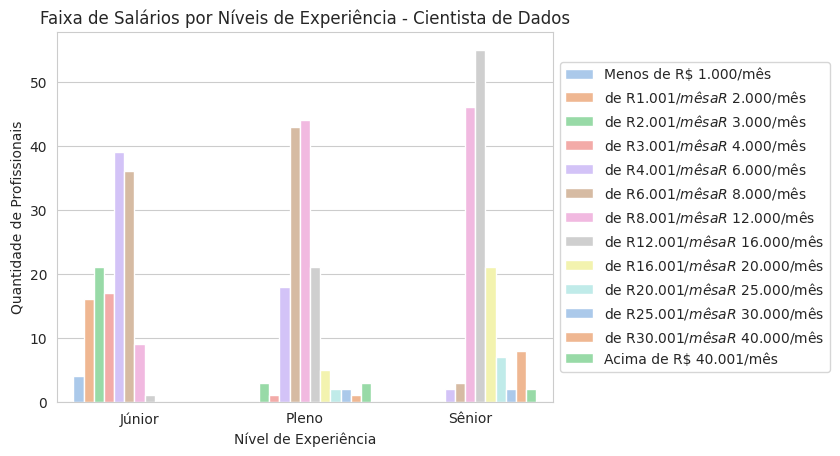

In [20]:
data = salario_cargo_experiencia_agg[salario_cargo_experiencia_agg['Cargo'] == 'Cientista']

with sns.axes_style('whitegrid'):
  plot = sns.barplot(data=data, x='Experiência', y='Quantidade', hue='Salário', palette='pastel')
  plot.set_title('Faixa de Salários por Níveis de Experiência - Cientista de Dados')
  plot.set_ylabel('Quantidade de Profissionais')
  plot.set_xlabel('Nível de Experiência')
  plot.legend(loc='center left', bbox_to_anchor=(1, 0.5))

**Engenheiro de Dados:**

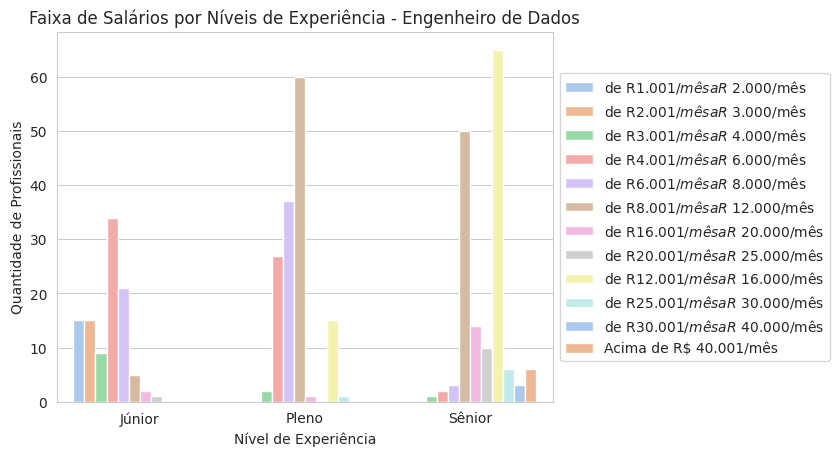

In [21]:
data = salario_cargo_experiencia_agg[salario_cargo_experiencia_agg['Cargo'] == 'Engenheiro']

with sns.axes_style('whitegrid'):
  plot = sns.barplot(data=data, x='Experiência', y='Quantidade', hue='Salário', palette='pastel')
  plot.set_title('Faixa de Salários por Níveis de Experiência - Engenheiro de Dados')
  plot.set_ylabel('Quantidade de Profissionais')
  plot.set_xlabel('Nível de Experiência')
  plot.legend(loc='center left', bbox_to_anchor=(1, 0.5))
  plot.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# 6\. Resultados

**Alguns insights:**

Um analista junior, recebe entre 2.000,00 a 6.000,00 por mês, majoritariamente. O sênior possui salários mais altos, na faixa entre 6.000,00 e 16.000,00, com um pico de 8.000,00 a 12.000,00 por mês. O analista pleno possui uma faixa salarial intermediária entre os outros 2 cargos, no geral e mantém um padrao de salário entre 4.000,00 e 8.000,00 por mês.

O cientista júnior, comparado com analista junior, ganha um pouco mais, considerando as mesmas barras em cada gráfico. O pleno possui menos profissionais recebendo entre 6.000,00 a 12.000,00 do que um analista com a mesma experiência. Um cientista sênior possui uma predominância na faixa de salário referente a 16.000,00/20.000,00 comparado com um analista sênior. Existem mais cientistas de dados recebendo salários na faixa de 12.000,00 a 16.000,00 com nível de experiência sênior.

Os outliers, de certa forma, se comportam de maneira parecida considerando analistas e cientistas.

Um engenheiro junior parece que recebe um pouco menos do que um cientista junior. No pleno, conforme a experiência aumenta, o salário também aumenta bastante, como mostra a barra de faixa salarial referente a 8.000,00/12.000,00. O engenheiro sênior apresenta muito mais profissionais que recebem na faixa entre 12.000,00 e 16.000,00 do que um cientista sênior, por exemplo.

Na profissão de engenheiro, os salários são menos distribuídos entre as experiências do que os cargos de analista e cientista. Essa profissão também apresenta mais picos salariais.

Os gráficos se comportam, de maneira geral, dentro do conceito de distribuição normal ou Gaussiana, muito utilizada na inferência estatística, onde a função f(x) é uma curva simétrica, unimodal com forma de sino.

Finalmente, é possivel perceber nos gráficos a movimentação salarial, conforme o profissional de dados avança na carreira, para cada uma das experiências.